## Linear noise approximation v.s exact chemical master equation
Consider following two systems :
\begin{align}
X_1 + X_2 &\leftrightarrow X_3  \qquad \qquad \qquad \; k_1:\text{forward} \quad k_0 : \text{backward}
\\
X_1 + X_2 &\leftrightarrow X_3  \; , \qquad \varnothing \leftrightarrow X_1 \quad
k_2:\text{forward} \quad k_3 : \text{backward} \quad \text{for the second reaction}
\end{align}
We would like to find steady state mean and covariance by CME and LNA respectively .

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.integrate as sci

### First system
The propensity functions are given by

\begin{equation} f_1(X) = k_1 X_1 X_2  \qquad f_0(X)= k_0 X_3 \end{equation}

In [52]:
# rate setting
k1= 1
k0 =0.1

#time setting
t=0
t_end= 200000
t_sample = 10*max(1/k1 , 1/k0)

#initial state
X1 = 1 
X2 = 5 
X3 = 100 


In [22]:
def R_1(k0,k1,X1_ini,X2_ini,X3_ini ) :
    
    #initial setting
    X1 = X1_ini
    X2 = X2_ini
    X3 = X3_ini
    t_sample = 10*max(1/k0 , 1/k1)
    t_array = np.zeros(int( t_end/t_sample) +1 )
    X1_array = np.zeros(int( t_end/t_sample) +1 )
    X2_array = np.zeros(int( t_end/t_sample) + 1)
    X3_array = np.zeros( int(t_end/t_sample) +1)
   
    j=0
    X1_array[j] = X1
    X2_array[j] = X2
    X3_array[j] = X3
    #start the process
  
    t=0
    while t < t_end :
        #compute stochastic rate
        a = [k0*X3 , k1*X1*X2 ]
        a0 = sum(a)
    
        #genertae two uniform r.vs
        r1 , r2 = np.random.rand(2)
        #update time (exclude r1=0 ) according the lemma
        while r1 ==0:
            r1 = np.random.rand(1)
        t_next = (1/a0)*(  np.log(1/r1))
        t = t + t_next
        
        #determine next reaction according the lemma
        i = 0
        mu = 0
        amu = 0 
        while amu < r2*a0 : #sum up a_i until the value exceed a0*r2
            mu = mu + 1
            amu = amu + a[i]
            i = i+1
        #update the state
        if mu == 1:
            X1 = X1+1
            X2 = X2+1
            X3 = X3-1
        elif mu ==2 :
            X1 = X1-1
            X2 = X2-1
            X3 = X3+1
        #sample the data , if t is already out of range then stop
        if t > t_end:
            print('done')
            break
        
        #here need to use while since it's possible that j+1*t_sample < t
        while t >= j*t_sample: 
            j = j+1
            t_array[j] = j
            X1_array[j] = X1
            X2_array[j] = X2
            X3_array[j] = X3
            print("now" , j ,"-th sample")
    return  t_array , X1_array , X2_array , X3_array 

In [23]:
 t_array , X1_array , X2_array , X3_array = R_1(k0 = 1,k1 = 5, X1_ini = 1,X2_ini = 5,X3_ini =100 )

now 1 -th sample
now 2 -th sample
now 3 -th sample
now 4 -th sample
now 5 -th sample
now 6 -th sample
now 7 -th sample
now 8 -th sample
now 9 -th sample
now 10 -th sample
now 11 -th sample
now 12 -th sample
now 13 -th sample
now 14 -th sample
now 15 -th sample
now 16 -th sample
now 17 -th sample
now 18 -th sample
now 19 -th sample
now 20 -th sample
now 21 -th sample
now 22 -th sample
now 23 -th sample
now 24 -th sample
now 25 -th sample
now 26 -th sample
now 27 -th sample
now 28 -th sample
now 29 -th sample
now 30 -th sample
now 31 -th sample
now 32 -th sample
now 33 -th sample
now 34 -th sample
now 35 -th sample
now 36 -th sample
now 37 -th sample
now 38 -th sample
now 39 -th sample
now 40 -th sample
now 41 -th sample
now 42 -th sample
now 43 -th sample
now 44 -th sample
now 45 -th sample
now 46 -th sample
now 47 -th sample
now 48 -th sample
now 49 -th sample
now 50 -th sample
now 51 -th sample
now 52 -th sample
now 53 -th sample
now 54 -th sample
now 55 -th sample
now 56 -th sample
n

We can approximate the steady state expected value using the ergodicity , i.e by the sample mean for long enough time 

In [24]:
# mean at the steady state for each species
def avg_1(X1_array , X2_array , X3_array ):
    mean_1 = np.zeros_like(X1_array)
    mean_2 = np.zeros_like(X1_array)
    mean_3 = np.zeros_like(X1_array)
    
    n=0
    while n < len(X1_array) :
        print(n)
        mean_1[n] = np.average( X1_array[:n+1] )
        mean_2[n] = np.average( X2_array[:n+1] )
        mean_3[n] = np.average( X3_array[:n+1] )
        n=n+1
    return  mean_1 ,  mean_2 ,  mean_3

In [25]:
m_1 , m_2 , m_3 = avg_1(X1_array , X2_array , X3_array )

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

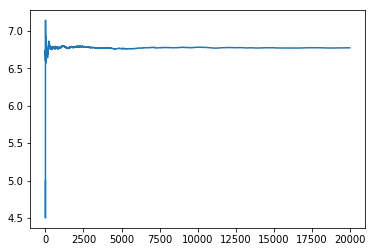

In [38]:
plt.plot(m_2)

#### Deterministic equation
The deterministic equation for the system is given by
\begin{equation}
\frac{d}{dt} \phi_1 = \frac{d}{dt} \phi_2 = -\frac{d}{dt} \phi_3  = -  k_1 \phi_1 \phi_2 + k_0 \phi_3
\end{equation}

In [89]:
def avg_LNA_1(k0,k1,X1_ini,X2_ini,X3_ini):
    def f(v ,t):
        x1,x2,x3 = v
        return -k1*x1*x2 + k0*x3 , -k1*x1*x2 + k0*x3  , k1*x1*x2 - k0*x3 
    tspan = np.arange(int( t_end/t_sample) +1 )
   
    return  sci.odeint( f , ( X1_ini,X2_ini,X3_ini) , tspan)

In [90]:
m_LNA = avg_LNA_1(k0 = 1,k1 = 5, X1_ini = 1,X2_ini = 5, X3_ini =100 )

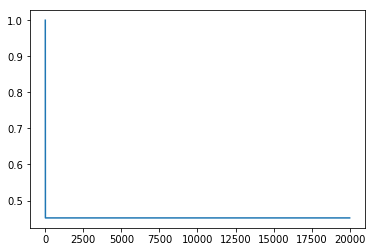

In [58]:
plt.plot(m_LNA_10[:,0])

### Comparison between exact CME and LNA
The below shows the simulation results for the mean of CME and LNA with $k_0 = 1 \; , \; k_1 = 5 $ 

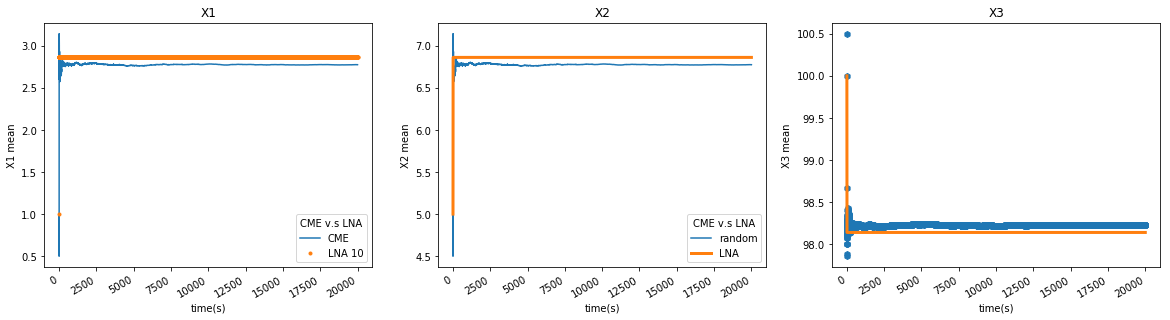

In [91]:
# plot the results
t_sample= 10*max(1/k0 , 1/k1)
fig , ax = plt.subplots(1,3 ,  figsize=(20,5))


ax[0].set_title("X1")
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('X1 mean')

ax[0].plot(  m_1 , label = "CME" )
ax[0].plot(  m_LNA[:,0]   , '.',label = "LNA 10"  )
ax[0].legend(title = "CME v.s LNA") 

ax[1].set_title("X2")
ax[1].set_xlabel('time(s)')
ax[1].set_ylabel('X2 mean')

ax[1].plot( m_2 , label = "random" )
ax[1].plot( m_LNA[:,1] , label = "LNA" ,  linewidth =3.0)
ax[1].legend(title = "CME v.s LNA") 

ax[2].set_title("X3")
ax[2].set_xlabel('time(s)')
ax[2].set_ylabel('X3 mean')

ax[2].plot(m_3 , 'h',label = "random" )
ax[2].plot(m_LNA[:,2]  , label = "LNA" ,  linewidth =3.0)
ax[2].legend(title = "CME v.s LNA") 
fig.autofmt_xdate()


### Covariance comparison
Covariance matrix $C$ of LNA at the steady state is given by
$$
\begin{equation}
\frac{d}{dt} C = AC + CA^T -BB^T =0
\end{equation}
$$
with 
$$
\begin{equation}
A=\begin{pmatrix}
-k_1 \phi_2  &-k_1 \phi_1    &    k_0     \\
-k_1 \phi_2  &-k_1 \phi_1    &    k_0     \\
-k_1 \phi_2  &-k_1 \phi_1    &    k_0     
\end{pmatrix}
\qquad
BB^T = (k_1\phi_1\phi_2+k_3\phi_3) I_{3 \times 3}
\end{equation}
$$

In [1]:
def Cov_LNA_1(k0,k1,X1_ini,X2_ini,X3_ini):
    
    def f(C,t):
        return np.dot(A,C) + np.dot(C.np.tran(A)) - B 
    tspan = np.arange(int( t_end/t_sample) +1 )
   
    return  sci.odeint( f , ( X1_ini,X2_ini,X3_ini) , tspan)

### Second system
The propensity functions are given by
\begin{equation} f_1(X) = k_1 X_1 X_2  \qquad f_0(X)= k_0 X_3 \qquad 
f_2(x) = k_2 \qquad f_3(x) = k_3 X_1
\end{equation}

In [4]:
# rate setting
k1= 1
k0 =0.1
k2=1
k3=1
#time setting
t=0
t_end= 200000
t_sample = max(1/k1 , 1/k0 , 1/k2 , 1/k3)

#initial state
X1_ini = 1 
X2_ini = 5 
X3_ini = 100 


In [5]:
def R_2(k0,k1,k2,k3,X1_ini,X2_ini,X3_ini ) :
    
    #initial setting
    X1 = X1_ini
    X2 = X2_ini
    X3 = X3_ini
    t_sample = 10*max(1/k1 , 1/k0 , 1/k2 , 1/k3)
    t_array = np.zeros(int( t_end/t_sample) +1 )
    X1_array = np.zeros(int( t_end/t_sample) +1 )
    X2_array = np.zeros(int( t_end/t_sample) + 1)
    X3_array = np.zeros( int(t_end/t_sample) +1)
   
    j=0
    X1_array[j] = X1
    X2_array[j] = X2
    X3_array[j] = X3
    #start the process
  
    t=0
    while t < t_end :
        #compute stochastic rate
        a = [k0*X3 , k1*X1*X2 , k2 , k3*X1 ]
        a0 = sum(a)
    
        #genertae two uniform r.vs
        r1 , r2 = np.random.rand(2)
        #update time (exclude r1=0 ) according the lemma
        while r1 ==0:
            r1 = np.random.rand(1)
        t_next = (1/a0)*(  np.log(1/r1))
        t = t + t_next
        
        #determine next reaction according the lemma
        i = 0
        mu = 0
        amu = 0 
        while amu < r2*a0 : #sum up a_i until the value exceed a0*r2
            mu = mu + 1
            amu = amu + a[i]
            i = i+1
        #update the state
        if mu == 1:
            X1 = X1+1
            X2 = X2+1
            X3 = X3-1
        elif mu ==2 :
            X1 = X1-1
            X2 = X2-1
            X3 = X3+1
        elif mu == 3 :
            X1 = X1+1
        elif mu == 4 :
            X1= X1-1
        #sample the data , if t is already out of range then stop
        if t > t_end:
            print('done')
            break
        
        #here need to use while since it's possible that (j+1)*t_sample < t
        while t >= j*t_sample: 
            j = j+1
            t_array[j] = j
            X1_array[j] = X1
            X2_array[j] = X2
            X3_array[j] = X3
            print("now" , j ,"-th sample")
    return  t_array , X1_array , X2_array , X3_array 

#### Deterministic equation
The deterministic equation for the system is given by
\begin{equation}
\frac{d}{dt} \phi_1 =  -  k_1 \phi_1 \phi_2 + k_0 \phi_3 +k_2 - k_3 \phi_1
\qquad
\frac{d}{dt} \phi_2 = -\frac{d}{dt} \phi_3  = -  k_1 \phi_1 \phi_2 + k_0 \phi_3
\end{equation}


In [6]:
def avg_LNA_2(k0,k1,k2,k3 , X1_ini,X2_ini,X3_ini):
    def f(v ,t):
        x1,x2,x3 = v
        return -k1*x1*x2 + k0*x3 +k2 - k3*x1 , -k1*x1*x2 + k0*x3  , k1*x1*x2 - k0*x3 
    tspan = np.arange(int( t_end/t_sample) +1 )
   
    return  sci.odeint( f , ( X1_ini,X2_ini,X3_ini) , tspan)

## Comparison

In [7]:
# mean at the steady state for each species
def avg_2(X1_array , X2_array , X3_array ):
    mean_1 = np.zeros_like(X1_array)
    mean_2 = np.zeros_like(X1_array)
    mean_3 = np.zeros_like(X1_array)
    
    n=0
    while n < len(X1_array) :
        mean_1[n] = np.average( X1_array[:n+1] )
        mean_2[n] = np.average( X2_array[:n+1] )
        mean_3[n] = np.average( X3_array[:n+1] )
        n=n+1
    return  mean_1 ,  mean_2 ,  mean_3

In [8]:
 t_array , X1_array , X2_array , X3_array = R_2(k0 ,k1 , k2,k3, X1_ini ,X2_ini ,X3_ini )

now 1 -th sample
now 2 -th sample
now 3 -th sample
now 4 -th sample
now 5 -th sample
now 6 -th sample
now 7 -th sample
now 8 -th sample
now 9 -th sample
now 10 -th sample
now 11 -th sample
now 12 -th sample
now 13 -th sample
now 14 -th sample
now 15 -th sample
now 16 -th sample
now 17 -th sample
now 18 -th sample
now 19 -th sample
now 20 -th sample
now 21 -th sample
now 22 -th sample
now 23 -th sample
now 24 -th sample
now 25 -th sample
now 26 -th sample
now 27 -th sample
now 28 -th sample
now 29 -th sample
now 30 -th sample
now 31 -th sample
now 32 -th sample
now 33 -th sample
now 34 -th sample
now 35 -th sample
now 36 -th sample
now 37 -th sample
now 38 -th sample
now 39 -th sample
now 40 -th sample
now 41 -th sample
now 42 -th sample
now 43 -th sample
now 44 -th sample
now 45 -th sample
now 46 -th sample
now 47 -th sample
now 48 -th sample
now 49 -th sample
now 50 -th sample
now 51 -th sample
now 52 -th sample
now 53 -th sample
now 54 -th sample
now 55 -th sample
now 56 -th sample
n

In [9]:
m_LNA = avg_LNA_2(k0 ,k1 , k2,k3 ,X1_ini ,X2_ini , X3_ini  )
m_1 , m_2 , m_3 = avg_2(X1_array , X2_array , X3_array )

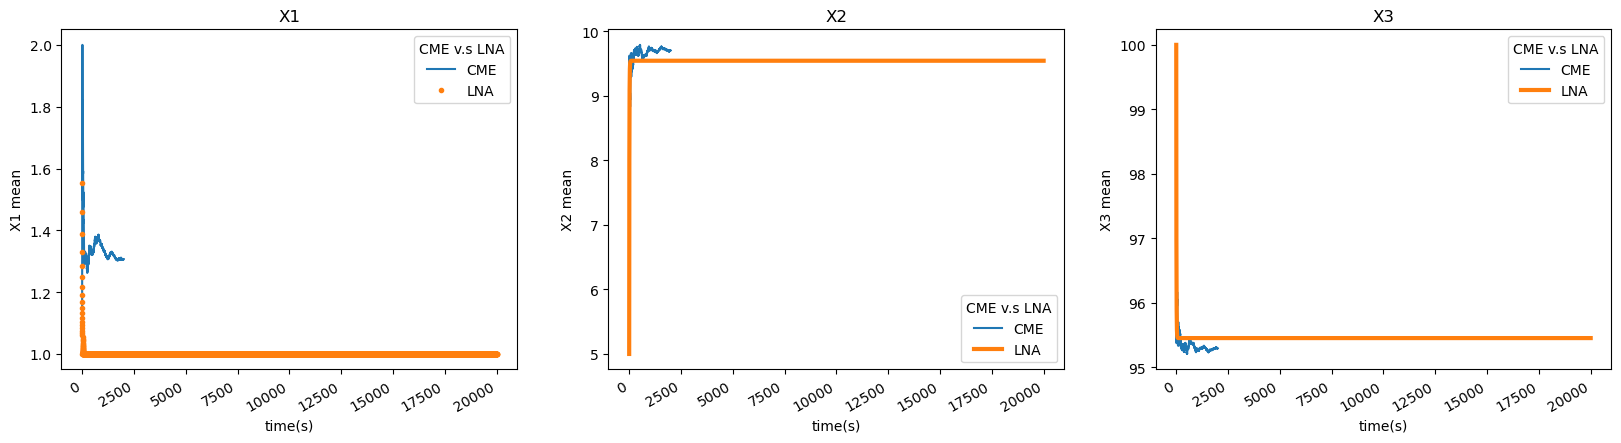

In [10]:
# plot the results

fig , ax = plt.subplots(1,3 ,  figsize=(20,5))


ax[0].set_title("X1")
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('X1 mean')

ax[0].plot(  m_1, label = "CME" )
ax[0].plot(  m_LNA[:,0]   , '.',label = "LNA"  )
ax[0].legend(title = "CME v.s LNA") 

ax[1].set_title("X2")
ax[1].set_xlabel('time(s)')
ax[1].set_ylabel('X2 mean')

ax[1].plot( m_2 , label = "CME" )
ax[1].plot( m_LNA[:,1] , label = "LNA" ,  linewidth =3.0)
ax[1].legend(title = "CME v.s LNA") 

ax[2].set_title("X3")
ax[2].set_xlabel('time(s)')
ax[2].set_ylabel('X3 mean')

ax[2].plot(m_3 , label = "CME" )
ax[2].plot(m_LNA[:,2]  , label = "LNA" ,  linewidth =3.0)
ax[2].legend(title = "CME v.s LNA") 
fig.autofmt_xdate()


(array([1301.,    0.,    0., 2192.,    0.,    0., 4410.,    0.,    0.,
        2097.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

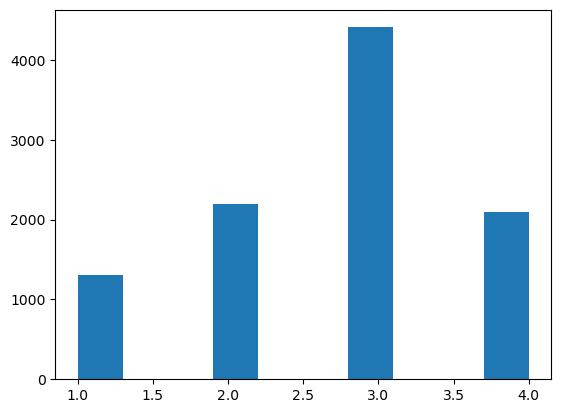

In [70]:
def test(N):
    X_array = np.zeros(N)
    for j in range(N):
        r = np.random.rand()
        i = 0
        X = 0
        S= 0 
        A = [0.1312 , 0.2232 , 0.4366 , 1 - (0.1312 + 0.2232 + 0.4366)]
        while S < r : 
            X = X + 1
            S = S + A[i]
            i = i+1
        X_array[j] = X
    return X_array
plt.hist(test(10000)  )